In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("meal_info.csv")
print(df1.head())

   meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian


In [3]:
grouped_categories = {
    'BE': ['Beverages', 'Extras'],
    'SOS': ['Soup', 'Other Snacks', 'Salad'],
    'RSS': ['Rice Bowl', 'Starters', 'Sandwich'],
    'PDB': ['Pasta', 'Desert', 'Biryani'],
    'PFS': ['Pizza', 'Fish', 'Seafood']
}

# Assign group numbers based on category
def assign_group(category):
    for group_category, categories in grouped_categories.items():
        if category in categories:
            return group_category
    return None

df1['group_category'] = df1['category'].apply(assign_group)

# Display the updated dataset with groups
print(df1.head(10))


   meal_id   category  cuisine group_category
0     1885  Beverages     Thai             BE
1     1993  Beverages     Thai             BE
2     2539  Beverages     Thai             BE
3     1248  Beverages   Indian             BE
4     2631  Beverages   Indian             BE
5     1311     Extras     Thai             BE
6     1062  Beverages  Italian             BE
7     1778  Beverages  Italian             BE
8     1803     Extras     Thai             BE
9     1198     Extras     Thai             BE


In [4]:
df1['group_category'].value_counts()

group_category
BE     15
SOS     9
RSS     9
PDB     9
PFS     9
Name: count, dtype: int64

In [5]:
df_train=pd.read_csv("train.csv")
df_train.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
df_train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [8]:
# Merge category counts into df1 based on category names
df_merged = pd.merge(df1, df_train)

# Display the merged dataset
print(df_merged)

        meal_id   category      cuisine group_category       id  week  \
0          1885  Beverages         Thai             BE  1379560     1   
1          1885  Beverages         Thai             BE  1040403     1   
2          1885  Beverages         Thai             BE  1103215     1   
3          1885  Beverages         Thai             BE  1034383     1   
4          1885  Beverages         Thai             BE  1118999     1   
...         ...        ...          ...            ...      ...   ...   
456543     1445    Seafood  Continental            PFS  1242817   145   
456544     1445    Seafood  Continental            PFS  1321101   145   
456545     1445    Seafood  Continental            PFS  1189559   145   
456546     1445    Seafood  Continental            PFS  1288412   145   
456547     1445    Seafood  Continental            PFS  1055597   145   

        center_id  checkout_price  base_price  emailer_for_promotion  \
0              55          136.83      152.29      

In [10]:
df_train['center_id'].value_counts()

center_id
13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: count, Length: 77, dtype: int64

In [11]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define a function to fit the ARIMA model and calculate the MSE
def fit_arima_and_evaluate(df_train, order=(5, 1, 0)):
    train_size = int(len(df_train) * 0.8)
    train, test = df_train[:train_size], df_train[train_size:]
    
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    
    predictions = model_fit.forecast(steps=len(test))
    mse = mean_squared_error(test, predictions)
    
    return mse, model_fit

# Group data by center_id and apply the function
results = {}

for center_id, group in df_train.groupby('center_id'):
    num_orders = group['num_orders'].values
    mse, model_fit = fit_arima_and_evaluate(num_orders)
    results[center_id] = mse

# Find the center_id with the lowest MSE
best_center_id = min(results, key=results.get)
best_mse = results[best_center_id]

print(f'The best center_id for forecasting is {best_center_id} with a MSE of {best_mse}')


The best center_id for forecasting is 74 with a MSE of 14812.155428993103


In [12]:
selected_center=df_merged[df_merged['center_id']==74]
selected_center

,meal_id,category,cuisine,group_category,id,week,center_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
17,1885,Beverages,Thai,BE,1426763,1,74,118.40,118.40,0,0,257
94,1885,Beverages,Thai,BE,1068800,2,74,101.91,117.40,1,0,325
171,1885,Beverages,Thai,BE,1101624,3,74,96.03,118.40,0,0,595
248,1885,Beverages,Thai,BE,1249477,4,74,122.28,116.40,0,1,406
324,1885,Beverages,Thai,BE,1221878,5,74,119.34,116.40,0,1,393
...,...,...,...,...,...,...,...,...,...,...,...,...
456028,1445,Seafood,Continental,PFS,1211591,137,74,765.33,767.33,0,0,15
456135,1445,Seafood,Continental,PFS,1187376,139,74,726.53,728.53,0,0,14
456302,1445,Seafood,Continental,PFS,1010528,142,74,728.53,726.53,0,0,14
456359,1445,Seafood,Continental,PFS,1496915,143,74,582.03,728.53,0,0,53


In [13]:
missing=selected_center.isnull().sum()
print("Missing Values:\n", missing)


Missing Values:
 meal_id                  0
category                 0
cuisine                  0
group_category           0
id                       0
week                     0
center_id                0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64


In [14]:
selected_center['checkout_price'].value_counts()

checkout_price
282.33    112
281.33    106
280.33    103
641.23     83
640.23     63
         ... 
212.43      1
348.29      1
359.90      1
380.30      1
531.59      1
Name: count, Length: 901, dtype: int64

In [15]:
selected_center['base_price'].value_counts()

base_price
281.33    127
639.23    120
282.33    115
280.33    104
641.23    101
         ... 
353.08      1
303.64      1
304.61      1
310.46      1
714.92      1
Name: count, Length: 652, dtype: int64

In [16]:
selected_center['center_id'].value_counts()

center_id
74    5264
Name: count, dtype: int64

In [17]:
correlation = selected_center['base_price'].corr(selected_center['checkout_price'])
print(f"The correlation between duration in months and credit amount is: {correlation}")

The correlation between duration in months and credit amount is: 0.9559211947339629


# Visualization

This observation indicates that the base prices (the initial prices of products before any discounts) tend to cluster within a narrower price range, suggesting a more uniform pricing strategy. In contrast, the checkout prices (the prices after discounts are applied) show a broader distribution, reflecting the impact of varying discount levels.

To delve deeper into this, you could analyze the distribution of the discount percentages applied to understand their effect on the final checkout prices. Additionally, comparing the means and standard deviations of base prices and checkout prices can provide further insights into their variability and central tendencies.



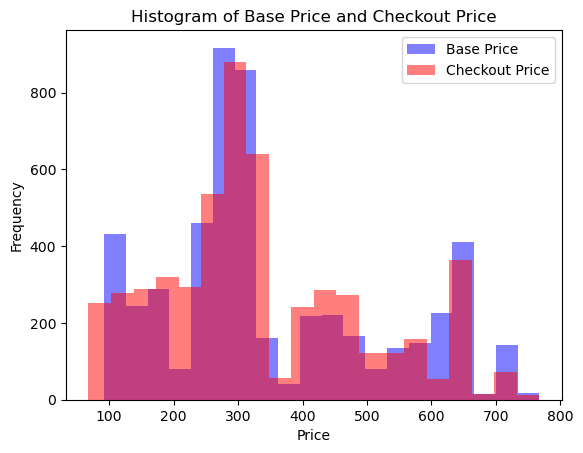

In [18]:
# Plot histogram for base_price
plt.hist(selected_center['base_price'], bins=20, color='blue', alpha=0.5, label='Base Price')

# Plot histogram for checkout_price
plt.hist(selected_center['checkout_price'], bins=20, color='red', alpha=0.5, label='Checkout Price')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Base Price and Checkout Price')
plt.legend()
plt.show()

The resulting bar chart will show the number of orders for each category, providing a clear visual representation of the distribution of orders among different category types. This helps in understanding which category are more popular based on the number of orders

#The visualization aims to show the distribution of the number of orders across different groups. This can help identify which groups have higher or lower order volumes, providing insights into group performance or demand patterns.


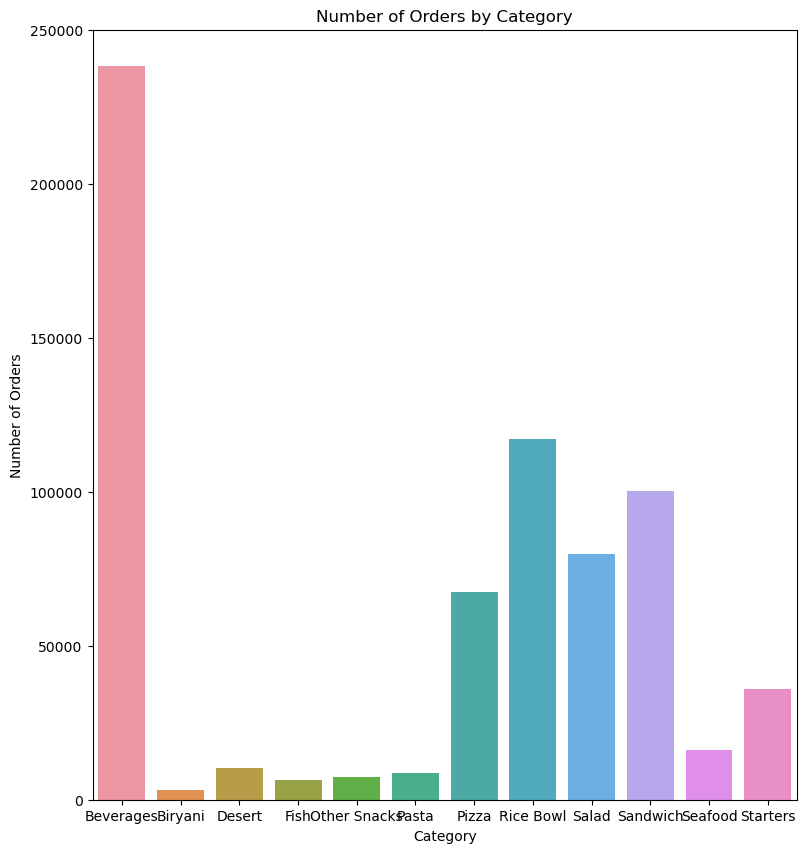

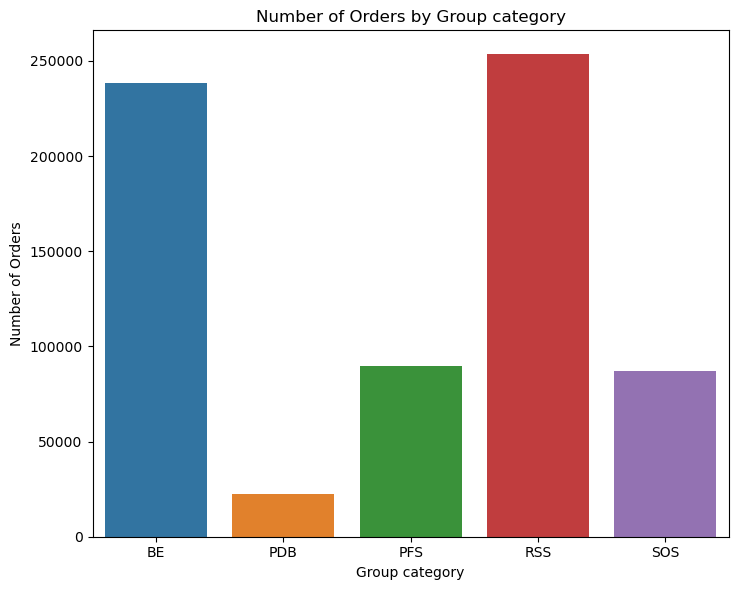

In [23]:
# Aggregating data by center and group
group_orders = selected_center.groupby('category')['num_orders'].sum().reset_index()

# Plotting
plt.figure(figsize=(20, 10))

# Bar plot for groups
plt.subplot(1, 2, 2)
sns.barplot(y='num_orders', x='category', data=group_orders)
plt.title('Number of Orders by Category')
plt.ylabel('Number of Orders')
plt.xlabel('Category')

# Aggregating data by center and group
group_orders = selected_center.groupby('group_category')['num_orders'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 6))

# Bar plot for groups
plt.subplot(1, 2, 2)
sns.barplot(y='num_orders', x='group_category', data=group_orders)
plt.title('Number of Orders by Group category')
plt.ylabel('Number of Orders')
plt.xlabel('Group category')

plt.tight_layout()
plt.show()




#The resulting bar chart will show the number of orders for each cuisine, providing a clear visual representation of the distribution of orders among different cuisine types. This helps in understanding which cuisines are more popular based on the number of orders.

Text(0.5, 0, 'Cuisine')

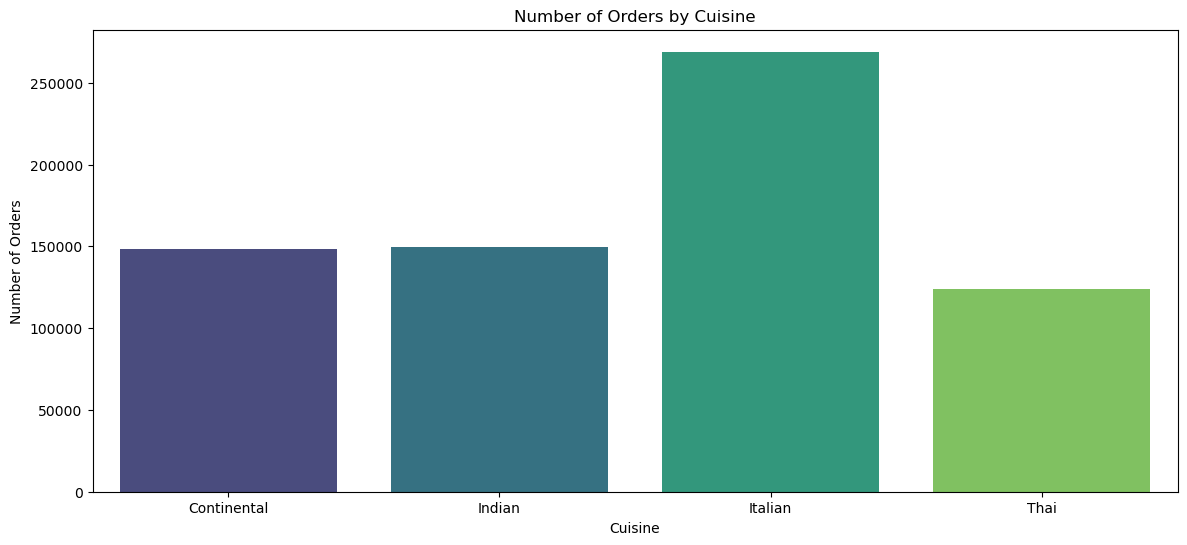

In [26]:
# Aggregating data by center and group
cuisine_orders = selected_center.groupby('cuisine')['num_orders'].sum().reset_index()

# Bar plot for cuisines
plt.figure(figsize=(14, 6))
sns.barplot(y='num_orders', x='cuisine', data=cuisine_orders, palette='viridis')
plt.title('Number of Orders by Cuisine')
plt.ylabel('Number of Orders')
plt.xlabel('Cuisine')



In [28]:
selected_id=selected_center.drop(columns=(['id','center_id','category','cuisine','group_category']))
print(selected_id)

        meal_id  week  checkout_price  base_price  emailer_for_promotion  \
17         1885     1          118.40      118.40                      0   
94         1885     2          101.91      117.40                      1   
171        1885     3           96.03      118.40                      0   
248        1885     4          122.28      116.40                      0   
324        1885     5          119.34      116.40                      0   
...         ...   ...             ...         ...                    ...   
456028     1445   137          765.33      767.33                      0   
456135     1445   139          726.53      728.53                      0   
456302     1445   142          728.53      726.53                      0   
456359     1445   143          582.03      728.53                      0   
456433     1445   144          581.03      728.53                      1   

        homepage_featured  num_orders  
17                      0         257  
94     

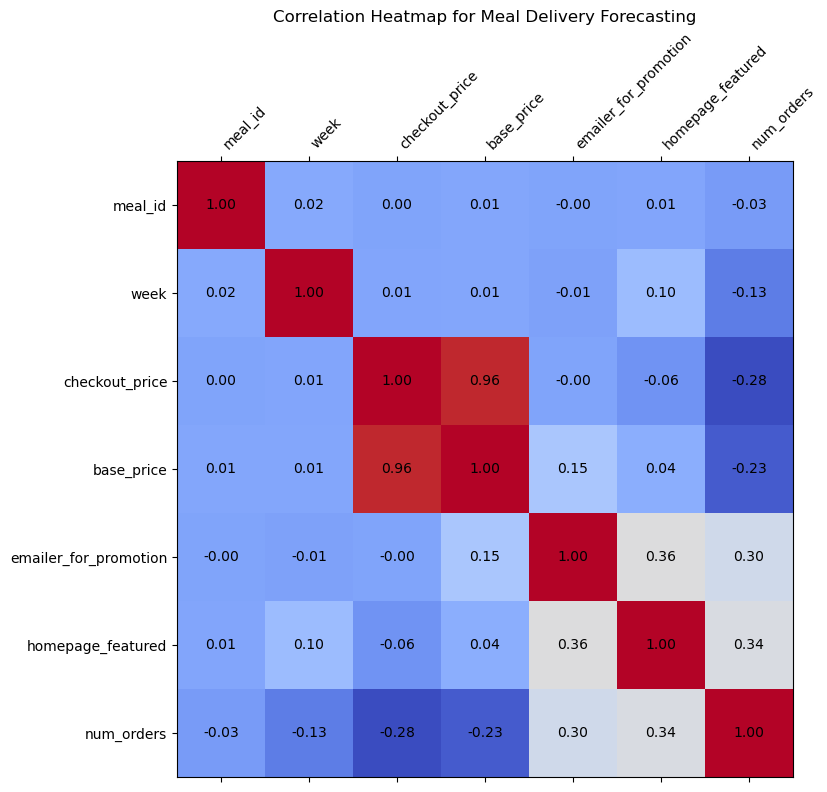

In [29]:
correlation_matrix = selected_id.corr()


# Step 3: Plot heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap
cax = ax.matshow(correlation_matrix, cmap='coolwarm')



# Set axis labels
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='left')
ax.set_yticklabels(correlation_matrix.columns)

# Annotate each cell with the correlation value
for (i, j), val in np.ndenumerate(correlation_matrix):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Heatmap for Meal Delivery Forecasting')
plt.show()

The histogram of base prices can provide valuable insights into pricing strategies. To analyze this, let's consider a dataset of base prices and create a histogram. This will help us visualize how the prices are distributed, particularly if there are clusters around certain price points, indicating potential pricing strategies like discounts or premium offers.

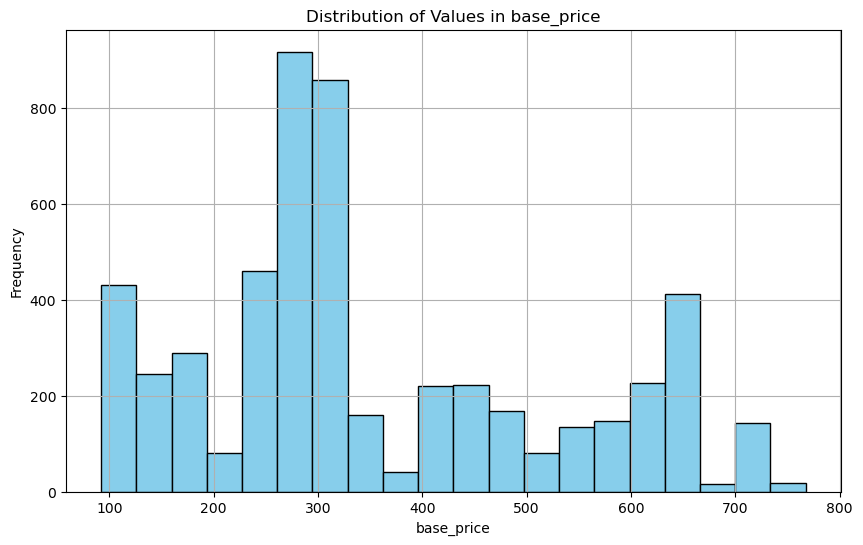

In [30]:
column_to_visualize = 'base_price'

# Plotting a histogram of the selected column
plt.figure(figsize=(10, 6))
plt.hist(selected_center[column_to_visualize], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Values in {}'.format(column_to_visualize))
plt.xlabel(column_to_visualize)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [31]:
selected_center['num_orders'].value_counts()

num_orders
14      267
13      256
15      244
28      189
27      178
       ... 
742       1
838       1
906       1
1148      1
636       1
Name: count, Length: 179, dtype: int64

To visualize the relationship between the number of orders and the frequency of email promotions over time, we can create a line plot with two y-axes: one for the number of orders and the other for the frequency of email promotions. This will help us observe potential correlations or effects of promotional activities on order volumes.

Conceptual Steps

Data Preparation:

Gather data on the number of orders and the frequency of email promotions over time.

Plotting:

Use one line to plot the number of orders over time.

Use another line to plot the frequency of email promotions over time.

Utilize dual y-axes to show both metrics clearly.

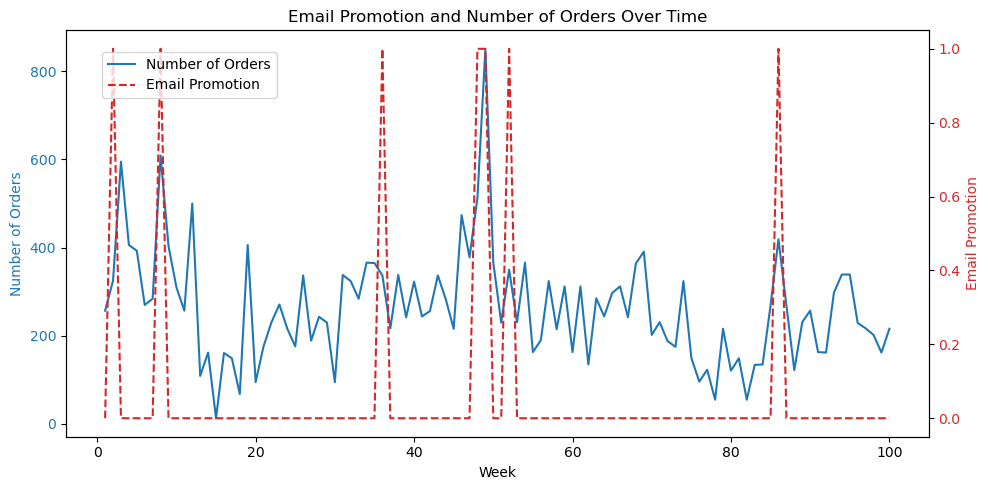

In [33]:
# Assuming 'selected_center' is your DataFrame containing the relevant data
# Filter data for weeks 0 to 145
filtered_data = selected_center[(selected_center['week'] >= 0) & (selected_center['week'] <= 145)]
random_value=filtered_data.iloc[:100]
# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot num_orders
color = 'tab:blue'
ax1.set_xlabel('Week')
ax1.set_ylabel('Number of Orders', color=color)
ax1.plot(random_value['week'], random_value['num_orders'], color=color, label='Number of Orders')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot emailer_for_promotion
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Email Promotion', color=color)
ax2.plot(random_value['week'], random_value['emailer_for_promotion'], color=color, label='Email Promotion', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Email Promotion and Number of Orders Over Time')
fig.tight_layout()  # To ensure the right y-label is not slightly clipped
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.show()

#The bar plot visualizes the number of orders over weeks for Center ID 74, illustrating variations and trends in order volumes across different weeks.

To create a bar plot illustrating the number of orders over weeks for Center ID 74, we can follow these steps:

Data Preparation: Ensure you have data that includes weeks and the corresponding number of orders for Center ID 74.

Plotting: Use a bar plot to visualize this data, where weeks are on the x-axis and the number of orders on the y-axis.

Selection deleted


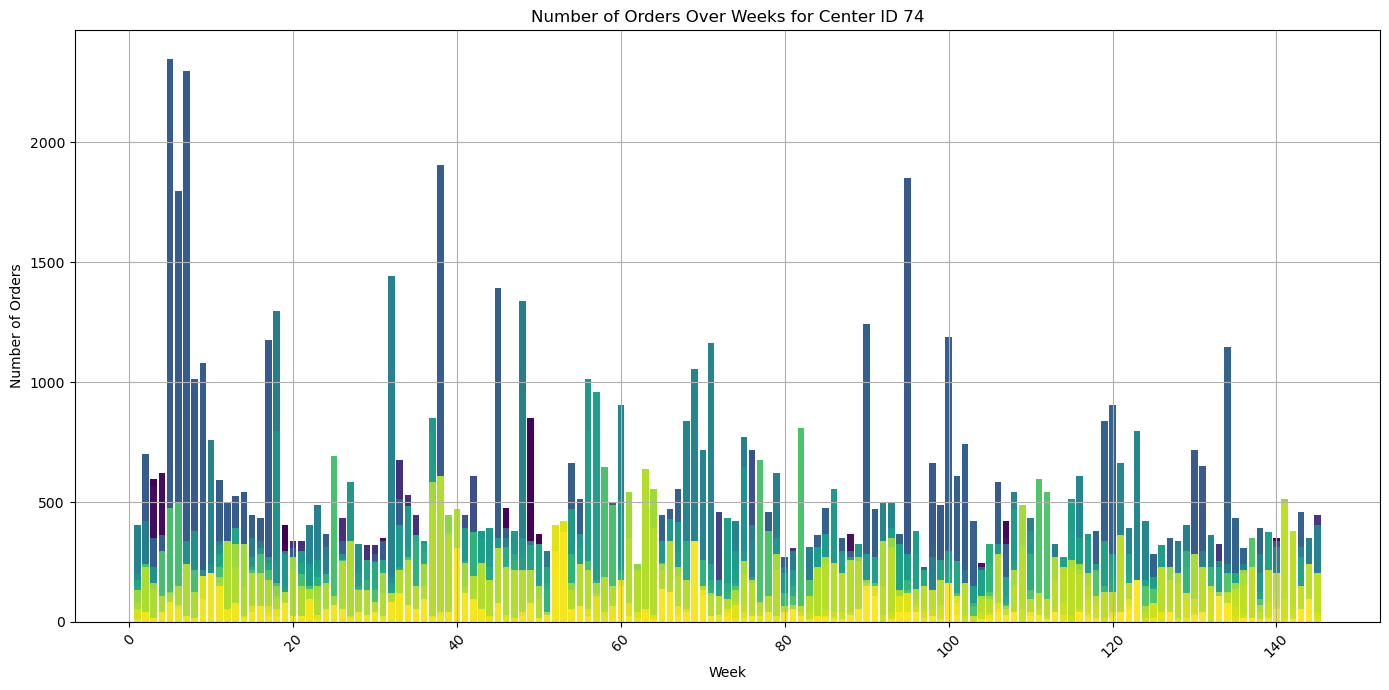

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_center)))

plt.figure(figsize=(14, 7))
plt.bar(selected_center['week'], selected_center['num_orders'], color=colors)
plt.title('Number of Orders Over Weeks for Center ID 74')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
